<a href="https://colab.research.google.com/github/Shashank-Karanam/BISLAB/blob/main/LAB_CIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 0voZsAzNu3tO8hXzY-scaled.jpg to 0voZsAzNu3tO8hXzY-scaled (3).jpg


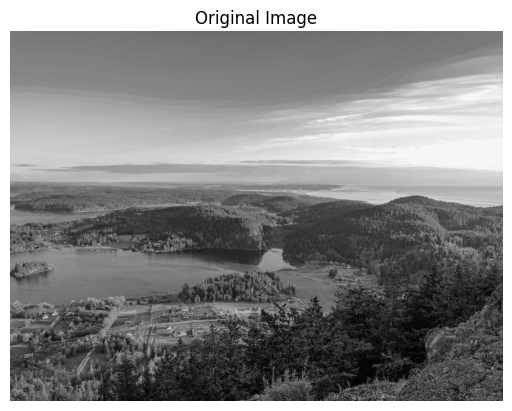

/tmp/ipython-input-2764212499.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_t = nests[i] + int(step * 10)


Iter 1/60 — Best Threshold: 136
Iter 2/60 — Best Threshold: 103
Iter 3/60 — Best Threshold: 114
Iter 4/60 — Best Threshold: 114
Iter 5/60 — Best Threshold: 114
Iter 6/60 — Best Threshold: 114
Iter 7/60 — Best Threshold: 112
Iter 8/60 — Best Threshold: 111
Iter 9/60 — Best Threshold: 111
Iter 10/60 — Best Threshold: 111
Iter 11/60 — Best Threshold: 110
Iter 12/60 — Best Threshold: 110
Iter 13/60 — Best Threshold: 110
Iter 14/60 — Best Threshold: 110
Iter 15/60 — Best Threshold: 110
Iter 16/60 — Best Threshold: 110
Iter 17/60 — Best Threshold: 110
Iter 18/60 — Best Threshold: 110
Iter 19/60 — Best Threshold: 110
Iter 20/60 — Best Threshold: 110
Iter 21/60 — Best Threshold: 110
Iter 22/60 — Best Threshold: 110
Iter 23/60 — Best Threshold: 110
Iter 24/60 — Best Threshold: 110
Iter 25/60 — Best Threshold: 110
Iter 26/60 — Best Threshold: 110
Iter 27/60 — Best Threshold: 110
Iter 28/60 — Best Threshold: 110
Iter 29/60 — Best Threshold: 110
Iter 30/60 — Best Threshold: 110
Iter 31/60 — Best T

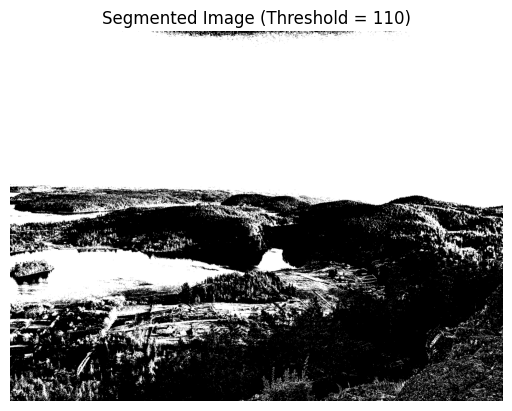

In [7]:


import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.random import rand, randint
import math


def levy_flight(Lambda):
    sigma = (math.gamma(1 + Lambda) * math.sin(math.pi * Lambda / 2) /
             (math.gamma((1 + Lambda) / 2) * Lambda * 2 ** ((Lambda - 1) / 2))) ** (1 / Lambda)
    u = np.random.normal(0, sigma, 1)
    v = np.random.normal(0, 1, 1)
    step = u / abs(v) ** (1 / Lambda)
    return step


def otsu_fitness(image, threshold):
    threshold = int(threshold)
    if threshold <= 0 or threshold >= 255:
        return -1e9


    foreground = image[image >= threshold]
    background = image[image < threshold]

    if len(foreground) == 0 or len(background) == 0:
        return -1e9

    w0 = len(background) / len(image.flat)
    w1 = len(foreground) / len(image.flat)
    m0 = np.mean(background)
    m1 = np.mean(foreground)

    variance = w0 * w1 * (m0 - m1) ** 2
    return variance

def cuckoo_search(image, n=20, alpha=0.05, Lambda=1.5, pa=0.25, max_iter=100):

    nests = np.random.randint(1, 255, size=n)
    fitness = np.array([otsu_fitness(image, t) for t in nests])

    best_idx = np.argmax(fitness)
    best_thresh = nests[best_idx]

    for t in range(max_iter):
        for i in range(n):

            step = alpha * levy_flight(Lambda)
            new_t = nests[i] + int(step * 10)


            new_t = np.clip(new_t, 1, 254)

            new_fit = otsu_fitness(image, new_t)


            j = randint(0, n)


            if new_fit > fitness[j]:
                nests[j] = new_t
                fitness[j] = new_fit


        abandon_idx = np.argsort(fitness)[:int(pa * n)]
        nests[abandon_idx] = np.random.randint(1, 255, size=len(abandon_idx))
        fitness[abandon_idx] = np.array([otsu_fitness(image, t) for t in nests[abandon_idx]])


        best_idx = np.argmax(fitness)
        best_thresh = nests[best_idx]

        print(f"Iter {t+1}/{max_iter} — Best Threshold: {best_thresh}")

    return best_thresh



from google.colab import files
uploaded = files.upload()

img_path = list(uploaded.keys())[0]
image = cv2.imread(img_path, 0)

plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


best_threshold = cuckoo_search(image, n=20, alpha=0.05, Lambda=1.5,
                               pa=0.25, max_iter=60)

print("\nBest threshold found by CSA:", best_threshold)

_, result = cv2.threshold(image, best_threshold, 255, cv2.THRESH_BINARY)

plt.imshow(result, cmap='gray')
plt.title(f"Segmented Image (Threshold = {best_threshold})")
plt.axis('off')
plt.show()

